In [164]:
import pandas as pd
import numpy as np
#from decimal import Decimal
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as pp
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import math
data = pd.read_csv('/Users/mayurjain/Documents/Fragma ML TEST/marketing-data.csv',sep=',',header='infer')
#print(data.education.unique())
#print(data.education.value_counts())
# sec = (data.education.value_counts()[0]/ len(data.education) * 100).tolist()
# pri = (data.education.value_counts()[1]/ len(data.education) * 100).tolist()
# teri = (data.education.value_counts()[2]/ len(data.education) * 100).tolist()
# tot = sec + pri + teri
# sec_unk = math.ceil((sec/tot) * 100)
# pri_unk = math.ceil((pri/tot) * 100)
# teri_unk = math.ceil((teri/tot) * 100) -1
# unk_sec = math.ceil((data.education.value_counts()[3] * sec_unk) / 100 )
# unk_pri = math.ceil((data.education.value_counts()[3] * pri_unk) / 100 )
# unk_teri = math.ceil((data.education.value_counts()[3] * teri_unk) / 100 ) -1 

# for i in range(data.education.value_counts()[3]):
#     for j in range(len(data['education'])):
#         if i != unk_sec:
#             if data['education'][j] == 'unknown':
#                 data['education'][j] = 'secondary'
#         elif i != unk_sec+unk_pri:
#             if data['education'][j] == 'unknown':
#                 data['education'][j] = 'primary'
#         elif i != unk_sec+unk_pri+unk_teri:
#             if data['education'][j] == 'unknown':
#                 data['education'][j] = 'tertiary'
#         else:
#             break
            
def binaryType_(data):
    
    data.is_success.replace(('yes', 'no'), (1, 0), inplace=True)
    data.default.replace(('yes','no'),(1,0),inplace=True)
    data.housing.replace(('yes','no'),(1,0),inplace=True)
    data.loan.replace(('yes','no'),(1,0),inplace=True)
    return data

data = binaryType_(data)
#data.loc(data['education'][i].replace(('unknown'), ('secondary'), inplace=True) for i in range(unk_sec) if data['education'] == 'unknown') 
#print(data.columns)
#print(data.marital.unique())
#print(data[['marital', 'is_success']].groupby(['marital'], as_index=False).mean())
for i in range(len(data.marital.unique())):
    data["marital_"+str(data.marital.unique()[i])] = (data.marital == data.marital.unique()[i]).astype(int)

for j in range(len(data.job.unique())):
    data["job_"+str(data.job.unique()[j])] = (data.job == data.job.unique()[j]).astype(int)

for k in range(len(data.contact.unique())):
    data["contact_"+str(data.contact.unique()[k])] = (data.contact == data.contact.unique()[k]).astype(int)

for l in range(len(data.education.unique())):
    data['education_'+str(data.education.unique()[l])] = (data.education == data.education.unique()[l]).astype(int)
    
#for m in range(len(data.poutcome.unique())):
#    data['poutcome_'+str(data.poutcome.unique()[m])] = (data.poutcome == data.poutcome.unique()[m]).astype(int)

data = data.drop(['education'],axis=1)
data = data.drop(['marital'],axis=1)
data = data.drop(['job'],axis=1)
data = data.drop(['contact'],axis=1)



#print(data.columns)
#print(data.age.value_counts())
#print(data.campaign.value_counts())

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


In [176]:
from sklearn.ensemble import VotingClassifier
#data = data.drop(['poutcome'],axis=1)
from sklearn.neighbors import KNeighborsClassifier

#eclf1 = VotingClassifier(estimators=[('knn', knn)], voting='soft', weights=[2])

def age_(data):
    
    data.loc[data['age'] < 31, 'age'] = 1
    data.loc[(data['age'] < 58) & (data['age'] > 30), 'age'] = 2
    data.loc[(data['age'] < 83) & (data['age'] > 57), 'age'] = 3
    data.loc[data['age'] > 82, 'age'] = 4
    data['age'] = data['age'].astype(int)
    
    return data

def pdays_(data):

    data.loc[data['pdays'] < 50, 'pdays'] = 1
    data.loc[(data['pdays'] < 150) & (data['pdays'] > 49), 'pdays'] = 2
    data.loc[(data['pdays'] < 300) & (data['pdays'] > 149), 'pdays'] = 3
    data.loc[(data['pdays'] < 500) & (data['pdays'] > 299), 'pdays'] = 4
    data.loc[data['pdays'] > 499, 'pdays'] = 5
    data['pdays'] = data['pdays'].astype(int)
    return data

def campaign_(data):
    
    data.loc[(data['campaign'] < 10) & (data['campaign'] > 0), 'campaign'] = 1
    data.loc[(data['campaign'] < 20) & (data['campaign'] > 9) , 'campaign'] = 2
    data.loc[(data['campaign'] < 40) & (data['campaign'] > 19) , 'campaign'] = 3
    data.loc[data['campaign'] > 39, 'campaign'] = 4
    data['campaign'] = data['campaign'].astype(int)
    return data

def balance_(data):
    
    data.loc[(data['balance'] < 30000) & (data['balance'] >= 0 ), 'balance'] = 4
    data.loc[data['balance'] > 29999,'balance'] = 5
    data.loc[data['balance'] < -8000, 'balance'] = 1
    data.loc[(data['balance'] < -250) & (data['balance'] > -8000), 'balance'] = 2
    data.loc[(data['balance'] < 0) & (data['balance'] > -251), 'balance'] = 3
    data['balance'] = data['balance'].astype(int)
    return data
    

    
#data = pdays_(data)
#data = campaign_(data)
#data = balance_(data)
#data = age_(data)


#print(data[['education', 'is_success']].groupby(['education'], as_index=False).mean())
#print(data.education.unique())
#print(data.columns)
#print(data[['housing', 'is_success']].groupby(['housing'], as_index=False).mean())
#print(data[['loan', 'is_success']].groupby(['loan'], as_index=False).mean())
#print(data[['job', 'is_success']].groupby(['job'], as_index=False).mean())
# print(data[['pdays', 'is_success']].groupby(['pdays'], as_index=False).mean())
# print(data[['previous', 'is_success']].groupby(['previous'], as_index=False).mean())
# print(data[['poutcome', 'is_success']].groupby(['poutcome'], as_index=False).mean())
# print(data[['campaign', 'is_success']].groupby(['campaign'], as_index=False).mean())
# from sklearn import preprocessing
# LEncoder = preprocessing.LabelEncoder()
# LEncoder.fit(['admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown'])
# data['job'] = LEncoder.transform(data['job'])
#print(data['job'])



data_X = data.drop(['is_success','day','month'],axis=1)
data_y = pd.DataFrame(data['is_success'])
X_train,X_test,y_train,y_test = train_test_split(data_X,data_y,test_size=0.2,random_state=89)

modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)
y_pred = modelGNB.predict(X_test)

print(accuracy_score(y_test,y_pred))

modelMNB = BernoulliNB()
modelMNB.fit(X_train, y_train)
y_pred = modelMNB.predict(X_test)

print(accuracy_score(y_test,y_pred))

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
print(accuracy_score(y_test,y_predict))

rforest = RandomForestClassifier()
rforest = rforest.fit(X_train,y_train)
yprediction = rforest.predict(X_test)

print(accuracy_score(yprediction,y_test))

# clf = svm.SVC(kernel='rbf', C=1,gamma=1)
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)

# print(accuracy_score(y_test,y_pred))


/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:89: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


0.83290943271
0.850934424417
0.879907110472


/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:94: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.890191308194


In [135]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=11,shuffle=True,random_state=42)
trainX = data_X.iloc[:40000,:]
trainy = data_y.iloc[:40000,:]
global xtrain,ytrain,xvalid, yvalid
for train,valid in kf.split(trainX):
    xtrain, ytrain = trainX.iloc[train], trainy.iloc[train]
    xvalid, yvalid = trainX.iloc[valid], trainy.iloc[valid]
    GNB = GaussianNB()
    BNB = BernoulliNB()
    GNB = GNB.fit(xtrain, ytrain)
    pred = GNB.predict(xtrain)
    y_pred = GNB.predict(xvalid)
    print(accuracy_score(yvalid,y_pred))
    print(accuracy_score(ytrain,pred))
    print("_____________________________")

/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.911190541655
0.911778456123
_____________________________
0.914215012373
0.907763385859
_____________________________
0.911190541655
0.910733437835
_____________________________
0.904041792686
0.906223358909
_____________________________
0.909240924092
0.907518424816
_____________________________
0.898239823982
0.905923440766
_____________________________
0.913641364136
0.911945880541
_____________________________
0.895764576458
0.90380596194
_____________________________
0.905665566557
0.907545924541
_____________________________
0.913916391639
0.908975910241
_____________________________
0.913641364136
0.911175888241
_____________________________


In [136]:
testX = data_X.iloc[40000:,:]
testy = data_y.iloc[40000:,:]
predict_Y = GNB.predict(testX)
print(accuracy_score(predict_Y,testy))

0.554212243331


In [137]:
BNB = BNB.fit(xtrain,ytrain)
predict_Y = BNB.predict(testX)
print(accuracy_score(predict_Y,testy))

0.540395317597


/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
svmcc = svm.SVC(kernel='sigmoid',C=1,gamma=1)
svmcc = svmcc.fit(xtrain,ytrain)
predY = svmcc.predict(testX)
print(accuracy_score(predY,testy))

/Users/mayurjain/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.54077912109


In [138]:
rforest = RandomForestClassifier()
rforest = rforest.fit(xtrain,ytrain)
yprediction = rforest.predict(testX)
print(accuracy_score(yprediction,testy))

/Users/mayurjain/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.551525618883


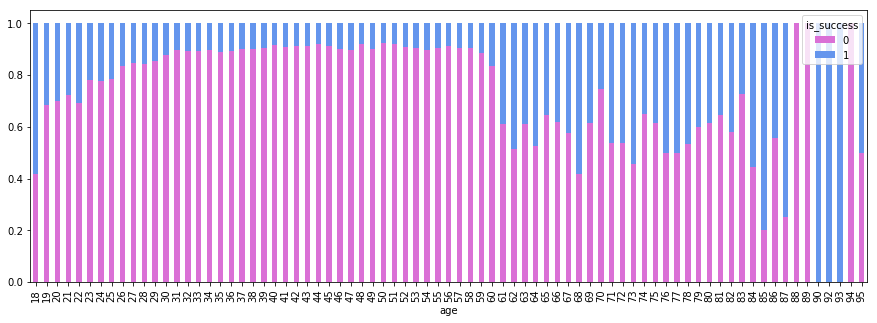

In [70]:
draw_data = pd.crosstab(data.age, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orchid','cornflowerblue'],grid=False, figsize=(15, 5))
pp.show()

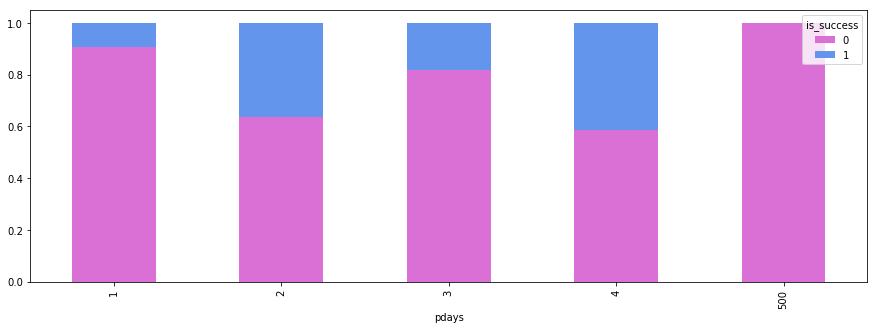

In [119]:
draw_data = pd.crosstab(data.pdays, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orchid','cornflowerblue'],grid=False, figsize=(15, 5))
pp.show()

In [120]:
draw_data = pd.crosstab(data.poutcome, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orchid','cornflowerblue'],grid=False, figsize=(15, 5))
pp.show()

AttributeError: 'DataFrame' object has no attribute 'poutcome'

In [ ]:
draw_data = pd.crosstab(data.balance, data.is_success)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['orchid','cornflowerblue'],grid=False, figsize=(15, 5))
pp.show()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
45181    False
45182    False
45183    False
45184    False
45185    False
45186    False
45187    False
45188    False
45189    False
45190    False
45191    False
45192    False
45193    False
45194    False
45195    False
45196    False
45197    False
45198    False
45199    False
45200    False
45201    False
45202    False
45203    False
45204    False
45205    False
45206    False
45207    False
45208    False
45209    False
45210    False
Name: neg, Length: 45211, dtype: bool
0        NaN
1        NaN
2        NaN
3       